# Introduction to Machine Learning
## Lecture 3 - Classification
### Notebook 6: Complete Classification Analysis on Wine Data
Prapared by: Said Bolluk

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
data.shape

(6497, 13)

In [4]:
# Create a copy of the dataset
wine_data = data.copy()

In [5]:
data.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Delete the empty rows

In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Resizing the target values: We will decrease the number of classes to improve the efficiency of the classification.

In [8]:
data["quality"].value_counts()

6    2820
5    2128
7    1074
4     214
8     192
3      30
9       5
Name: quality, dtype: int64

Transform the class labels:\
low_quality: 1\
mid_quality: 2\
high_quality: 3

In [9]:
low_quality = [3, 4, 5]
mid_quality = [6]
high_quality = [7, 8, 9]

data["quality"].replace(low_quality, 1, inplace=True)
data["quality"].replace(mid_quality, 2, inplace=True)
data["quality"].replace(high_quality, 3, inplace=True)

In [10]:
data["quality"].value_counts()

2    2820
1    2372
3    1271
Name: quality, dtype: int64

## Feature Selection

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [12]:
# Assign the feature set and the target variable
target_name = "quality"
target = data[target_name]

data = data.drop(columns=[target_name])

In [13]:
# Separate the categorical and numerical columns

from sklearn.compose import make_column_selector as selector

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(data)
categorical_columns = categorical_columns_selector(data)

In [14]:
print("Numerical columns:", numerical_columns)
print("\nCategorical columns:", categorical_columns)

Numerical columns: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

Categorical columns: ['type']


1) Categorical Features

In [15]:
data["type"].value_counts()

white    4870
red      1593
Name: type, dtype: int64

The class distribution of the **Type** feature is imbalanced. However, we will continue with the Type feature since it reserves useful information about the quality of a wine.

2) Numerical Features

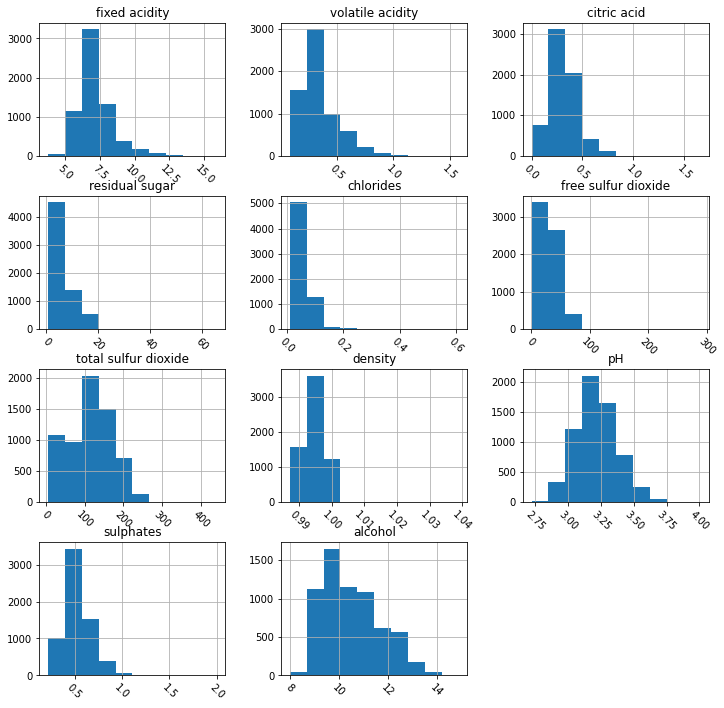

In [16]:
# Histogram view for the numerical features
data.hist(bins=10, figsize=(12, 12), xrot=-45)
plt.show()

Some features, such as **residual sugar, chlorides, and density**, have irregular distribution. However, we cannot take the risk of loosing information by discarding them. Therefore, we will include all the numerical features in the analysis. Note that the feature distribution should be elaborately investigated in to improve the classification performance.

## Preprocessing

1) Encoding categorical features using OneHotEncoder

In [17]:
data.shape

(6463, 12)

In [18]:
X = pd.get_dummies(data)

In [19]:
X.shape

(6463, 13)

Note that we have additional one feature column since the categorical feature **Type** has two classes: White and Red.

2) Transforming numerical features using StandardScaler

In [20]:
X = X.values
y = target.values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("Training size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Training size: 4847
Test size: 1616


In [21]:
# Scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit the data according to the training set
scaler.fit(X_train)
# Transform the sets using training parameters
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# CLASSIFICATION

We will test several machine learning models in classifying the wine quality. The classification models are respectively: (1) Gaussian Naive Bayes, (2) k-Nearest Neighbor,  and (3) Decision Tree.

In [22]:
# Import the necessary libraries to utilize classification 
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

We will collect the results of each classification model in the **report_df.**

In [23]:
report_df = pd.DataFrame()

## 1) Gaussian Naive Bayes Classifier

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# Define a model
bayes = GaussianNB()
# Train the model
bayes.fit(X_train_scaled, y_train)
# Make predictions
predictions = bayes.predict(X_test_scaled)
# Test the accuracy of the model
accuracy = np.sum(y_test==predictions) / y_test.shape[0]
print(f"Accuracy of Gaussian NB: {accuracy:.2f}")

Accuracy of Gaussian NB: 0.47


In [26]:
# Observe the classificaiton results
print(classification_report(y_test, bayes.predict(X_test_scaled)))

              precision    recall  f1-score   support

           1       0.60      0.45      0.51       604
           2       0.45      0.38      0.41       686
           3       0.39      0.70      0.50       326

    accuracy                           0.47      1616
   macro avg       0.48      0.51      0.47      1616
weighted avg       0.49      0.47      0.47      1616



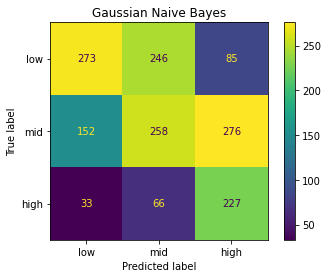

In [27]:
# Confusion Matrix
wine_quality = ["low", "mid", "high"]
cm = confusion_matrix(y_test, bayes.predict(X_test_scaled), labels=[1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine_quality)
disp.plot()
plt.title("Gaussian Naive Bayes")
plt.show()

In [28]:
bayes_fp1 = 246 + 85
bayes_fp2 = 152 + 276
bayes_fp3 = 33 + 66

In [29]:
bayes_results = {
    "Classifier": "Gaussian Naive Bayes", 
    "Accuracy": accuracy_score(y_test, bayes.predict(X_test_scaled)), 
    "Precision": np.mean(precision_score(y_test, bayes.predict(X_test_scaled), average=None)),
    "Recall": np.mean(recall_score(y_test, bayes.predict(X_test_scaled), average=None)),
    "F1-Score": np.mean(f1_score(y_test, bayes.predict(X_test_scaled), average=None)), 
}
              
report_df = report_df.append(bayes_results, ignore_index=True, sort=True)

## 2) k-Nearest Neighbor Classifier

In [30]:
from sklearn.neighbors import KNeighborsClassifier

First, determine the optimal hyperparameter: **number of neighbors**

In [31]:
# Set the neighborhood values for testing:
neighbors = [100, 50, 25, 10, 5, 1]

training_accuracy = list()
test_accuracy = list()

for n in neighbors:
    # Define a model
    knn = KNeighborsClassifier(n_neighbors=n)
    # Fit the training set
    knn.fit(X_train_scaled, y_train)
    # Make predictions over the training set
    pred_train = knn.predict(X_train_scaled)
    # Make predictions over the test set
    pred_test = knn.predict(X_test_scaled)
    # Calculate the accuracy score for training and test sets
    accuracy_training = np.sum(y_train==pred_train) / y_train.shape[0]
    accuracy_test = np.sum(y_test==pred_test) / y_test.shape[0]
    training_accuracy.append(accuracy_training)
    test_accuracy.append(accuracy_test)
    print(f"Test accuracy score of the k-NN with n_neighbors={n}: {accuracy_test:.3f}")

Test accuracy score of the k-NN with n_neighbors=100: 0.598
Test accuracy score of the k-NN with n_neighbors=50: 0.593
Test accuracy score of the k-NN with n_neighbors=25: 0.601
Test accuracy score of the k-NN with n_neighbors=10: 0.601
Test accuracy score of the k-NN with n_neighbors=5: 0.597
Test accuracy score of the k-NN with n_neighbors=1: 0.665


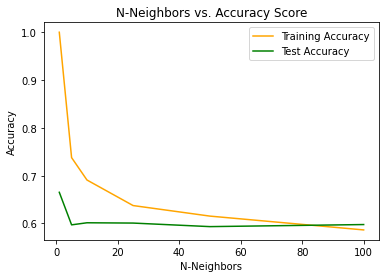

In [32]:
# Visualize the results
plt.figure(figsize=(6, 4))
plt.plot(neighbors, training_accuracy, color="orange", label="Training Accuracy")
plt.plot(neighbors, test_accuracy, color="green", label="Test Accuracy")
plt.title("N-Neighbors vs. Accuracy Score")
plt.xlabel("N-Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

After n_neighbors=10 in decending order, the training accuracy jumps. We do not want to over-fit the model. Thus, we will continue with **n_neighbors=10.**

In [33]:
# Define a model
knn = KNeighborsClassifier(n_neighbors=10)
# Train the model
knn.fit(X_train_scaled, y_train)
# Make predictions
predictions = knn.predict(X_test_scaled)
# Test the accuracy of the model
accuracy = np.sum(y_test==predictions) / y_test.shape[0]
print(f"Accuracy of k-NN: {accuracy:.2f}")

Accuracy of k-NN: 0.60


In [34]:
# Observe the classificaiton results
print(classification_report(y_test, knn.predict(X_test_scaled)))

              precision    recall  f1-score   support

           1       0.67      0.66      0.67       604
           2       0.56      0.60      0.58       686
           3       0.57      0.49      0.52       326

    accuracy                           0.60      1616
   macro avg       0.60      0.58      0.59      1616
weighted avg       0.60      0.60      0.60      1616



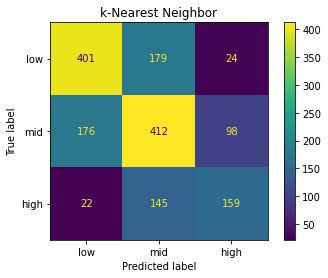

In [35]:
# Confusion Matrix
wine_quality = ["low", "mid", "high"]
cm = confusion_matrix(y_test, knn.predict(X_test_scaled), labels=[1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine_quality)
disp.plot()
plt.title("k-Nearest Neighbor")
plt.show()

In [36]:
knn_fp1 = 179 + 24
knn_fp2 = 176 + 98
knn_fp3 = 22 + 145

In [37]:
knn_results = {
    "Classifier": "k-Nearest Neighbor", 
    "Accuracy": accuracy_score(y_test, knn.predict(X_test_scaled)), 
    "Precision": np.mean(precision_score(y_test, knn.predict(X_test_scaled), average=None)),
    "Recall": np.mean(recall_score(y_test, knn.predict(X_test_scaled), average=None)),
    "F1-Score": np.mean(f1_score(y_test, knn.predict(X_test_scaled), average=None)), 
}
              
report_df = report_df.append(knn_results, ignore_index=True, sort=True)

## 3) Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier

First, determine the optimal hyperparameter: **maximum tree depth**

In [39]:
# Set several maximum depths:
maximum_depth = [2**n for n in range(0, 7)]


accuracy_train = list()
accuracy_test = list()

for n in maximum_depth:
    # Define a model
    tree = DecisionTreeClassifier(max_depth=n, random_state=42)
    # Fit the training set
    tree.fit(X_train_scaled, y_train)
    # Make predictions over the test set
    train_predictions = tree.predict(X_train_scaled)
    test_predictions = tree.predict(X_test_scaled)
    # Calculate the accuracy score
    train_accuracy = np.sum(y_train==train_predictions) / y_train.shape[0]
    test_accuracy = np.sum(y_test==test_predictions) / y_test.shape[0]
    accuracy_train.append(train_accuracy)
    accuracy_test.append(test_accuracy)
    print(f"Test accuracy score of the Decision three with max_depth={n}: {test_accuracy:.3f}")

Test accuracy score of the Decision three with max_depth=1: 0.504
Test accuracy score of the Decision three with max_depth=2: 0.542
Test accuracy score of the Decision three with max_depth=4: 0.572
Test accuracy score of the Decision three with max_depth=8: 0.580
Test accuracy score of the Decision three with max_depth=16: 0.632
Test accuracy score of the Decision three with max_depth=32: 0.639
Test accuracy score of the Decision three with max_depth=64: 0.639


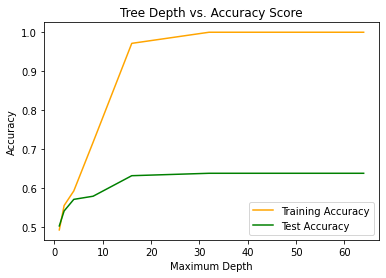

In [40]:
# Visualize the results
plt.figure(figsize=(6, 4))
plt.plot(maximum_depth, accuracy_train, color="orange", label="Training Accuracy")
plt.plot(maximum_depth, accuracy_test, color="green", label="Test Accuracy")
plt.title("Tree Depth vs. Accuracy Score")
plt.legend()
plt.xlabel("Maximum Depth")
plt.ylabel("Accuracy")
plt.show()

We can see that after max_depth=16, the test accuracy stop increasing. Therefore, we will continue with max_depth=16.

In [41]:
# Define a model
tree = DecisionTreeClassifier(max_depth=16, random_state=42)
# Train the model
tree.fit(X_train_scaled, y_train)
# Make predictions
predictions = tree.predict(X_test_scaled)
# Test the accuracy of the model
accuracy = np.sum(y_test==predictions) / y_test.shape[0]
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

Accuracy of Decision Tree: 0.63


In [42]:
# Observe the classificaiton results
print(classification_report(y_test, tree.predict(X_test_scaled)))

              precision    recall  f1-score   support

           1       0.71      0.66      0.68       604
           2       0.60      0.64      0.62       686
           3       0.57      0.56      0.57       326

    accuracy                           0.63      1616
   macro avg       0.63      0.62      0.62      1616
weighted avg       0.64      0.63      0.63      1616



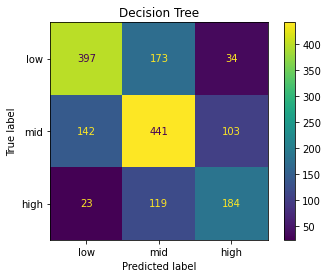

In [43]:
# Confusion Matrix
wine_quality = ["low", "mid", "high"]
cm = confusion_matrix(y_test, tree.predict(X_test_scaled), labels=[1, 2, 3])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine_quality)
disp.plot()
plt.title("Decision Tree")
plt.show()

In [44]:
tree_fp1 = 173 + 34
tree_fp2 = 142 + 103
tree_fp3 = 23 + 119

In [45]:
tree_results = {
    "Classifier": "Decision Tree", 
    "Accuracy": accuracy_score(y_test, tree.predict(X_test_scaled)), 
    "Precision": np.mean(precision_score(y_test, tree.predict(X_test_scaled), average=None)),
    "Recall": np.mean(recall_score(y_test, tree.predict(X_test_scaled), average=None)),
    "F1-Score": np.mean(f1_score(y_test, tree.predict(X_test_scaled), average=None)), 
}
              
report_df = report_df.append(tree_results, ignore_index=True, sort=True)

Compare the classification results

In [46]:
# Organize the frame
report_df = report_df[["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"]]

In [47]:
report_df.sort_values(by=["F1-Score"], ascending=False).round(3)

,Classifier,Accuracy,Precision,Recall,F1-Score
2,Decision Tree,0.632,0.627,0.622,0.624
1,k-Nearest Neighbor,0.601,0.598,0.584,0.590
0,Gaussian Naive Bayes,0.469,0.478,0.508,0.474


# Discussion

We can see that the F1 Score is the highest for the Decision Tree Classier. If we check the diagonals of the confusion matrices, we can also detect that the Decision Tree Classifier has the most True Positive (TP) values. However, the class distribution is not balanced. Plus, understanding the cost of making such classification is vital in machine learning. Therefore, we will examine the cost-sensitivity concept. We will calculate the cost of making wrong estimations for each classifier.\
Recall that we have three classes of wines: (1) low_quality, (2) mid_quality, and (3) high_quality. Let us say that labeling a wine low_quality is less costly than high_quality, considering the loss of money and possible health issues. With this assumption, we will determine the cost values of making wrong estimations for each class according to the False Positives (FP). 

In [48]:
# Cost of misclassification
# 1) low_quality
cost_one = 0.2
# 2) mid_quality
cost_two = 0.4
# 3) high_quality
cost_three = 0.6

cost_matrix = [cost_one, cost_two, cost_three]
print("Cost Matrix:", cost_matrix)

Cost Matrix: [0.2, 0.4, 0.6]


Let us say that **N** is the number of classes and **c** is the cost coefficient for each class. 

$$
\
\huge{Cost} = \huge{\frac{1}{N} \sum_{i=1}^N (c_{i}*FP_{i}})
\
$$

**Note:** The cost values are based on an intuitive idea. One should research the literature and conduct many testing to comprehend the actual costs of making misclassification in real life.

In [49]:
fp1 = [bayes_fp1, knn_fp1, tree_fp1]
fp2 = [bayes_fp2, knn_fp2, tree_fp2]
fp3 = [bayes_fp3, knn_fp3, tree_fp3]

In [50]:
report_df["FP(1)"] = fp1
report_df["FP(2)"] = fp2
report_df["FP(3)"] = fp3

In [51]:
# Combine FP's for each classifier
fp_bayes = report_df.iloc[0, 5::]
fp_knn = report_df.iloc[1, 5::]
fp_tree = report_df.iloc[2, 5::]

# Calculate the costs
bayes_cost = (1/3) * np.sum( np.multiply(cost_matrix, fp_bayes) ) 
knn_cost = (1/3) * np.sum( np.multiply(cost_matrix, fp_knn) )
tree_cost = (1/3) * np.sum( np.multiply(cost_matrix, fp_tree) )

# Insert the cost values into the report data frame
cost_list = np.round([bayes_cost, knn_cost, tree_cost], 3)
report_df["COST"] = cost_list

In [52]:
report_df.sort_values(by=["COST"], ascending=True).round(3)

,Classifier,Accuracy,Precision,Recall,F1-Score,FP(1),FP(2),FP(3),COST
2,Decision Tree,0.632,0.627,0.622,0.624,207,245,142,74.867
1,k-Nearest Neighbor,0.601,0.598,0.584,0.590,203,274,167,83.467
0,Gaussian Naive Bayes,0.469,0.478,0.508,0.474,331,428,99,98.933


We can see that the **Decision Tree Classifier** has the least cost. Considering it also has the highest F1 Score, we can conclude that the Decision Tree Classifier outperformed the other models in classifying the wine data.

**Final Note:** Please be reminded that in this study, the cost calculations depend on a fundamental assumption. A cost matrix can only be created after solid experiments and with expert opinions in reality. However, I wanted to show the cost-sensitivity concept with a simple introduction. Plus, the cost coefficients we assumed for classes are logical. Therefore, I find this part of the study helpful for beginners and those interested in the cost-sensitive approach in machine learning.

# END